In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [9]:
credits_df = pd.read_csv('../data/tmdb_5000_credits.csv')
movies_df = pd.read_csv('../data/tmdb_5000_movies.csv')

In [11]:
credits_df.shape

(4803, 4)

In [12]:
credits_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [13]:
credits_df.isna().sum()

,0
movie_id,0
title,0
cast,0
crew,0


In [14]:
movies_df.shape

(4803, 20)

In [15]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [16]:
movies_df.isna().sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [17]:
credits_df.describe(include='all')

,movie_id,title,cast,crew
count,4803.000000,4803,4803,4803
unique,NaN,4800,4761,4776
top,NaN,The Host,[],[]
freq,NaN,2,43,28
mean,57165.484281,NaN,NaN,NaN
std,88694.614033,NaN,NaN,NaN
min,5.000000,NaN,NaN,NaN
25%,9014.500000,NaN,NaN,NaN
50%,14629.000000,NaN,NaN,NaN
75%,58610.500000,NaN,NaN,NaN


In [18]:
movies_df.describe(include='all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


In [19]:
movies_df = movies_df.rename(columns={'id': 'movie_id'})
merged_df = movies_df.merge(credits_df, on='movie_id')

In [20]:
# Function to parse names from genres, cast, and crew
def parse_names(text):
    try:
        items = ast.literal_eval(text)
        return [item['name'] for item in items]
    except:
        return []

In [21]:
# Apply to relevant columns
merged_df['genres'] = merged_df['genres'].apply(parse_names)
merged_df['cast'] = merged_df['cast'].apply(parse_names)

# Fill missing values
merged_df['runtime'].fillna(merged_df['runtime'].mean(), inplace=True)

<ipython-input-21-3b61c1e1420d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['runtime'].fillna(merged_df['runtime'].mean(), inplace=True)


In [22]:
# Drop unnecessary columns
columns_to_drop = ['homepage', 'keywords', 'production_companies', 'production_countries', 'spoken_languages', 'crew', 'overview']
cleaned_df = merged_df.drop(columns=columns_to_drop)

In [29]:
print(cleaned_df.head())

      budget                                         genres  movie_id  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]     19995   
1  300000000                   [Adventure, Fantasy, Action]       285   
2  245000000                     [Action, Adventure, Crime]    206647   
3  250000000               [Action, Crime, Drama, Thriller]     49026   
4  260000000           [Action, Adventure, Science Fiction]     49529   

  original_language                            original_title  popularity  \
0                en                                    Avatar  150.437577   
1                en  Pirates of the Caribbean: At World's End  139.082615   
2                en                                   Spectre  107.376788   
3                en                     The Dark Knight Rises  112.312950   
4                en                               John Carter   43.926995   

  release_date     revenue  runtime    status  \
0   2009-12-10  2787965087    162.0  Released   


<ipython-input-23-9664356d442f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_data.values, y=genre_data.index, palette="Blues_d")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with 

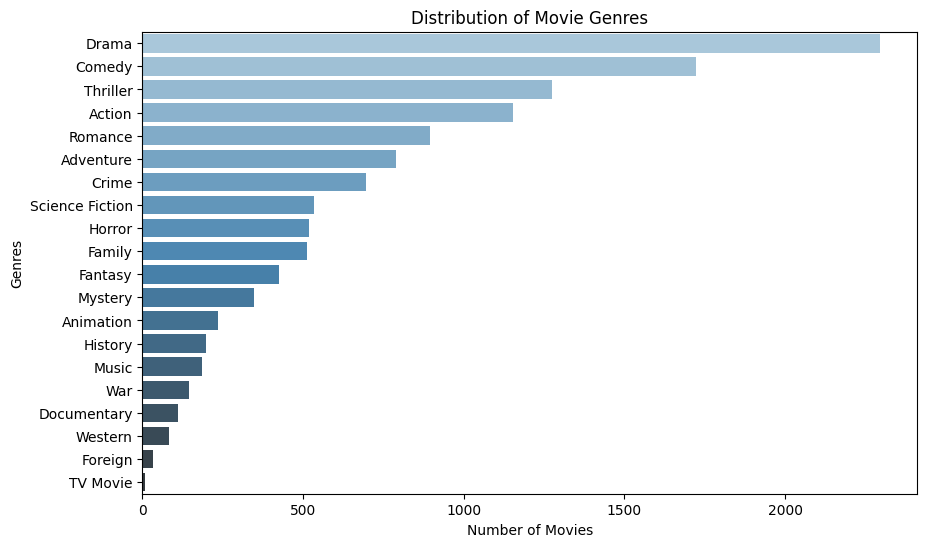

In [23]:
plt.figure(figsize=(10, 6))
genre_data = cleaned_df.explode('genres')['genres'].value_counts()
sns.barplot(x=genre_data.values, y=genre_data.index, palette="Blues_d")
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

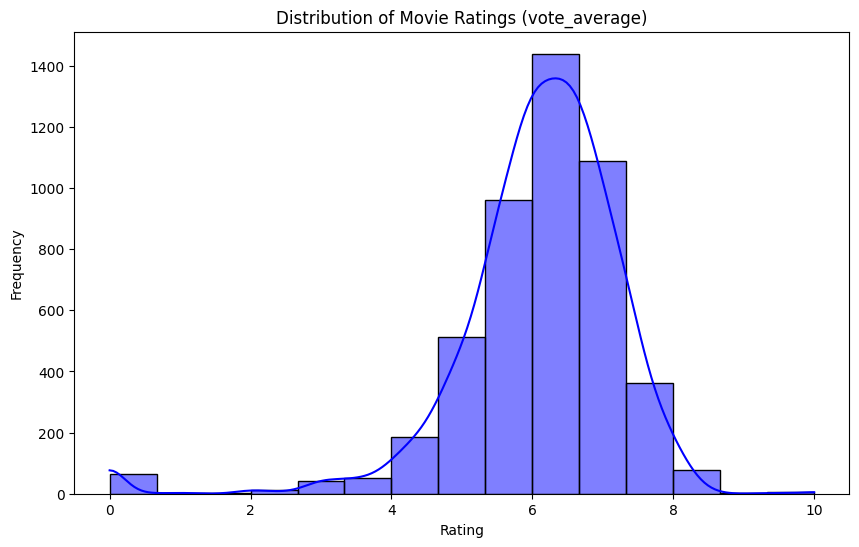

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['vote_average'], bins=15, kde=True, color='blue')
plt.title('Distribution of Movie Ratings (vote_average)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

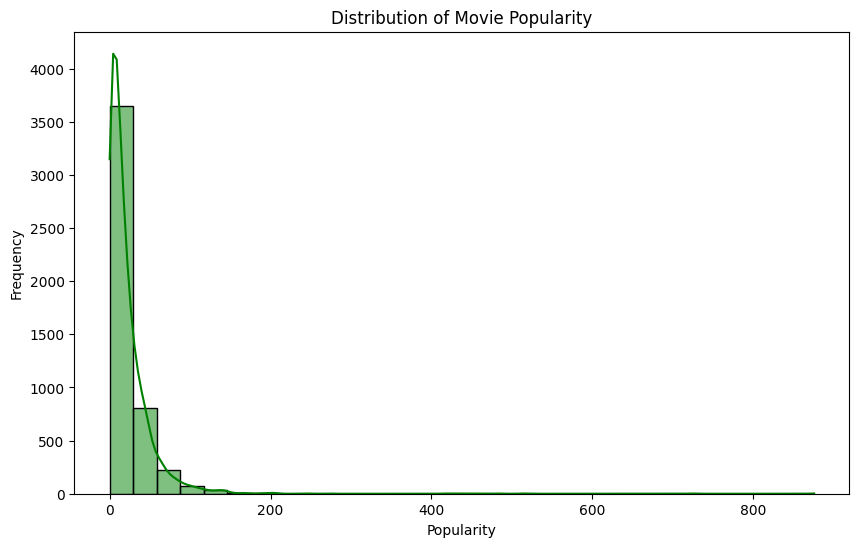

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['popularity'], bins=30, kde=True, color='green')
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

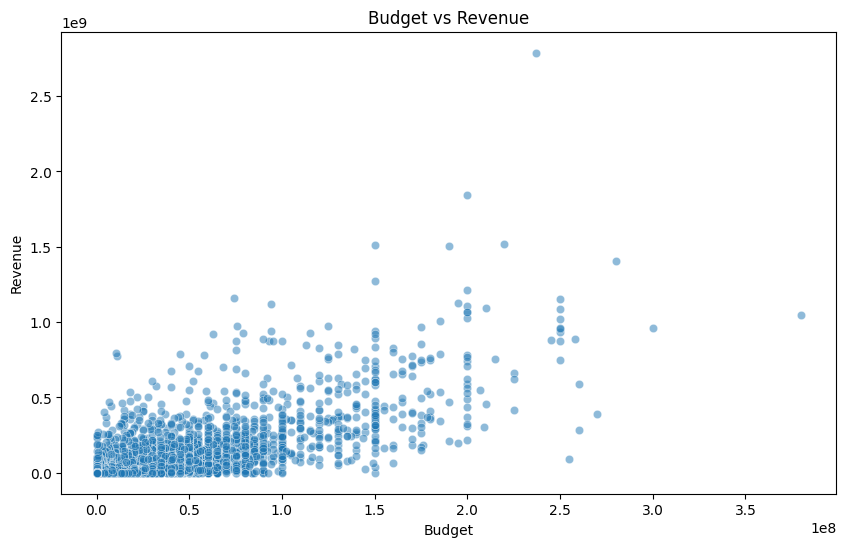

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_df['budget'], y=cleaned_df['revenue'], alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

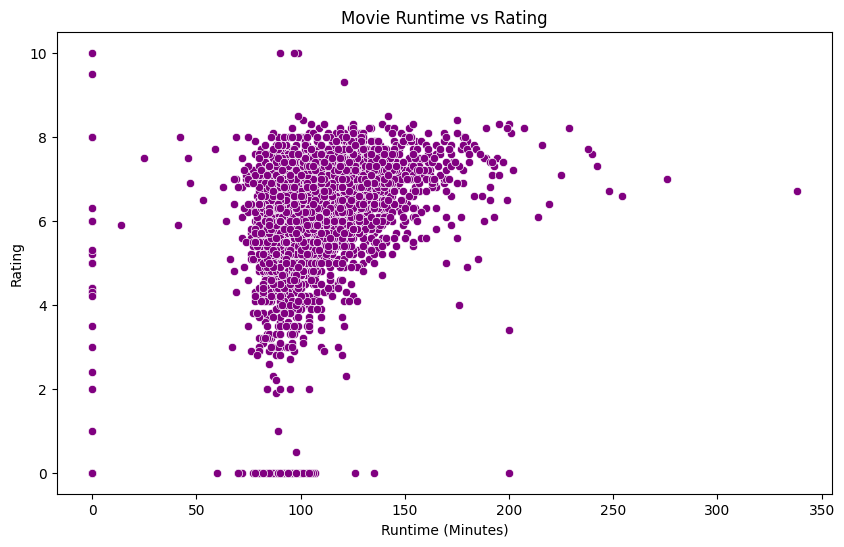

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_df['runtime'], y=cleaned_df['vote_average'], color='purple')
plt.title('Movie Runtime vs Rating')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Rating')
plt.show()

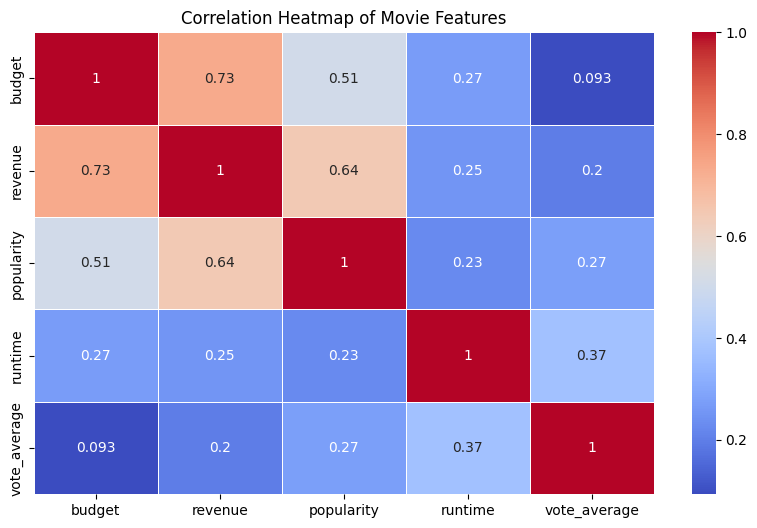

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_df[['budget', 'revenue', 'popularity', 'runtime', 'vote_average']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Movie Features')
plt.show()

<ipython-input-31-b81b1629ef38>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cast_data.values, y=cast_data.index, palette="Reds_d")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

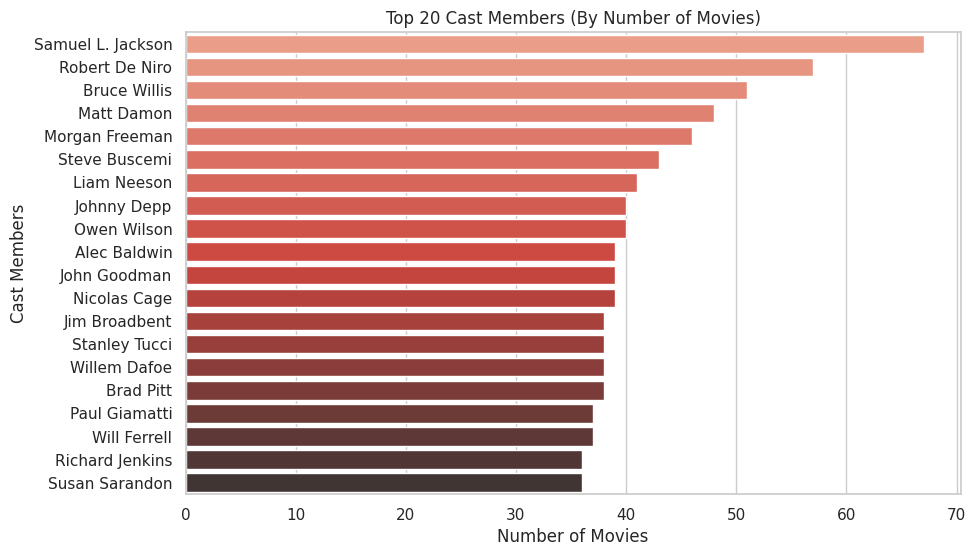

In [31]:
plt.figure(figsize=(10, 6))
cast_data = cleaned_df.explode('cast')['cast'].value_counts().head(20)
sns.barplot(x=cast_data.values, y=cast_data.index, palette="Reds_d")
plt.title('Top 20 Cast Members (By Number of Movies)')
plt.xlabel('Number of Movies')
plt.ylabel('Cast Members')
plt.show()